## Imports

In [129]:
import numpy as np
from tensorflow.keras import activations
import matplotlib.pyplot as plt
import numpy as np

## Creating Inputs

In [130]:
# 9 data points: one x1 x2 y

xy = np.matrix (
[[1.0, 0.0, 0.0, 0.5],
[1.0, 0.0, 0.5, 0.3],
[1.0, 0.0, 1.0, 0.2],
[1.0, 0.5, 0.0, 0.8],
[1.0, 0.5, 0.5, 0.5],
[1.0, 0.5, 1.0, 0.3],
[1.0, 1.0, 0.0, 1.0],
[1.0, 1.0, 0.5, 0.8],
[1.0, 1.0, 1.0, 0.5]]
)

In [131]:
# Taking first 3 columns of xy as matrix

x = xy[:,0:3]

In [132]:
# Taking last column of xy as array

y = xy[:, 3]

In [133]:
# Initializing B matrix

b = np.matrix (
[[0.1],
[0.2],
[0.1]]
)

## Testing Perceptron Parts

In [134]:
# Pre-activation vector

# u = np.dot(x, b)
# u = np.matmul(x, b)
u = x.dot(b)
u

matrix([[0.1 ],
        [0.15],
        [0.2 ],
        [0.2 ],
        [0.25],
        [0.3 ],
        [0.3 ],
        [0.35],
        [0.4 ]])

In [135]:
# Prediction vector

y_hat = activations.sigmoid(u)
y_hat


<tf.Tensor: shape=(9, 1), dtype=float64, numpy=
array([[0.52497919],
       [0.53742985],
       [0.549834  ],
       [0.549834  ],
       [0.5621765 ],
       [0.57444252],
       [0.57444252],
       [0.58661758],
       [0.59868766]])>

In [136]:
# Negative error vector

e = y_hat - y
e

<tf.Tensor: shape=(9, 1), dtype=float64, numpy=
array([[ 0.02497919],
       [ 0.23742985],
       [ 0.349834  ],
       [-0.250166  ],
       [ 0.0621765 ],
       [ 0.27444252],
       [-0.42555748],
       [-0.21338242],
       [ 0.09868766]])>

In [137]:
# Correction vector

delta = e * (y_hat * (1 - y_hat))
delta

<tf.Tensor: shape=(9, 1), dtype=float64, numpy=
array([[ 0.00622921],
       [ 0.05902482],
       [ 0.08658971],
       [-0.06192023],
       [ 0.01530376],
       [ 0.06708975],
       [-0.10403106],
       [-0.05174468],
       [ 0.02371077]])>

In [138]:
# Gradient vector

g = np.transpose(x).dot(delta)
g

matrix([[ 0.04025205],
        [-0.12182833],
        [ 0.18868219]])

In [139]:
# Updated values

b = b - g
b

matrix([[ 0.05974795],
        [ 0.32182833],
        [-0.08868219]])

In [140]:
# Finding the sum of squares total

y_mean = np.mean (y)
sst = 0

for each in y:
    sst = sst + (each - y_mean) ** 2

# This just pulls the sst value out of the matrix to make it easier to work with
sst = np.ndarray.item(sst)
sst

0.5822222222222222

In [141]:
# Calculating sum of squared error

sse = np.sum(e * e)
sse


0.5575188415228323

In [142]:
# Calculating r squared 

r_sq = 1 - (sse/sst)
r_sq

0.04242947066689107

## Putting Perceptron In Loop

In [143]:
# Setting b as new variable so it will not over written in loop
new_params = b

In [144]:
# Lists to hold values for plotting

sse_list = []
rsq_list = []
x_list = []

In [145]:
# Finding the sum of squares total

y_mean = np.mean (y)
sst = 0

for each in y:
    sst = sst + (each - y_mean) ** 2

# This just pulls the sst value out of the matrix to make it easier to work with
sst = np.ndarray.item(sst)
sst

0.5822222222222222

In [146]:
# 25 epochs for perceptron

for i in range(0, 25):
    
    # Pre-activation vector
    # u = np.dot(x, new_params)
    u = x.dot(new_params)
    # Predicted value vector
    y_hat = activations.sigmoid(u)
    # Negative error vector
    e = y_hat - y
    # Correction vector
    d = e * (y_hat * (1 - y_hat))
    # Gradients vector
    grad = np.transpose(x).dot(d)
    # Updated values vector
    new_params = new_params - grad

    # Sum of squared errors
    sse = np.sum(e * e)

    x_list.append(i)
    sse_list.append(sse)
    rsq_list.append(1-sse/sst)


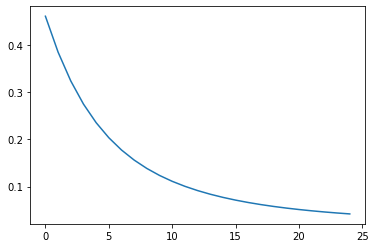

In [147]:
# Plotting sse vs epochs
plt.plot(x_list, sse_list)
plt.show()

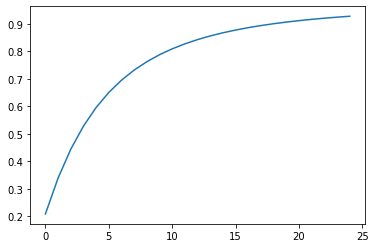

In [148]:
# Plotting rsq vs epochs
plt.plot(x_list, rsq_list)
plt.show()